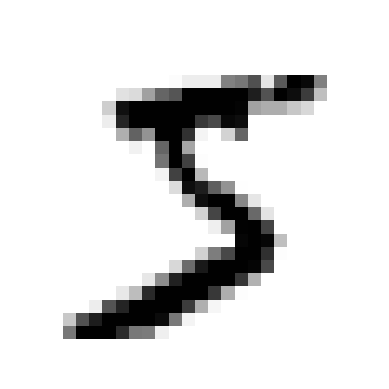

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

#loading MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

#Convert y to integer
y = y.astype(int)

#View one digit
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [3]:
# Binary Classification: is it a 5?
y_binary = (y == 5)  # True for 5, False for all other digits

In [4]:
from sklearn.linear_model import SGDClassifier

# Create and train the classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y_binary)

SGDClassifier(random_state=42)

In [5]:
sgd_clf.predict([some_digit])

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
# Evaluate accuracy using cross-validation
cross_val_score(sgd_clf, X, y_binary, cv=3, scoring="accuracy")

array([0.96794377, 0.94797069, 0.96194231])

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get predictions using cross-validation (not scores, just predictions)
y_pred = cross_val_predict(sgd_clf, X, y_binary, cv=3)

# Confusion Matrix
confusion = confusion_matrix(y_binary, y_pred)
print("Confusion Matrix:\n", confusion)

# Precision and Recall
print("Precision:", precision_score(y_binary, y_pred))
print("Recall:", recall_score(y_binary, y_pred))
print("F1 Score:", f1_score(y_binary, y_pred))

Confusion Matrix:
 [[61910  1777]
 [ 1073  5240]]
Precision: 0.7467578737352145
Recall: 0.8300332646919056
F1 Score: 0.7861965491372843


In [8]:
from sklearn.model_selection import cross_val_predict

# Get decision scores instead hard predictions
y_scores = cross_val_predict(sgd_clf, X, y_binary, cv=3, method="decision_function")

In [11]:
import numpy as np

# Example: Set a high threshold to increase precision
threshold = 0
y_pred_custom = (y_scores > threshold)

# Evaluate again
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_binary, y_pred_custom))
print("Recall:", recall_score(y_binary, y_pred_custom))

Precision: 0.7467578737352145
Recall: 0.8300332646919056


In [12]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_binary, y_scores)

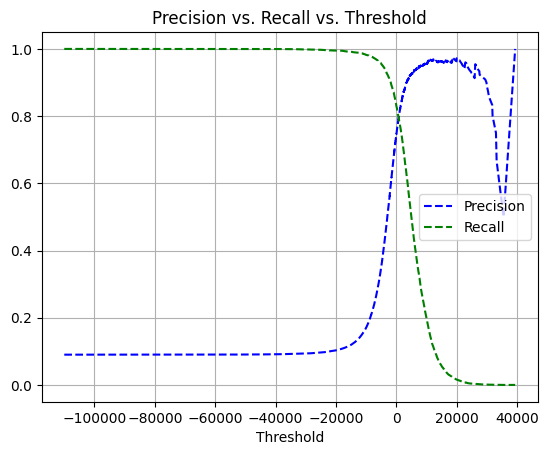

<Figure size 800x500 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.grid(True)
plt.title("Precision vs. Recall vs. Threshold")
plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, roc_thresholds = roc_curve(y_binary, y_scores)

In [19]:
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(8,5))
  plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal: random chance
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title("ROC Curve")
  plt.grid(True)
  plt.legend()
  plt.show()

  plot_roc_curve(fpr, tpr)


In [20]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_binary, y_scores)
print("AUC Score:", roc_auc)

AUC Score: 0.966907458229373
